<a href="https://colab.research.google.com/github/NandhaAnil/myproject/blob/main/Data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the dataset
data = pd.read_csv("/content/Tweets.csv")

In [3]:
# Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

In [4]:
# Handle missing values
data = data.dropna()

In [5]:
# Remove irrelevant columns
data = data[['airline_sentiment', 'text']]

In [6]:
# Text Preprocessing
# Tokenization
nltk.download('punkt')
data['text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Lowercasing
data['text'] = data['text'].apply(lambda x: [word.lower() for word in x])


In [8]:
# Stopword Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
# Data Exploration
# Summary statistics
sentiment_counts = data['airline_sentiment'].value_counts()

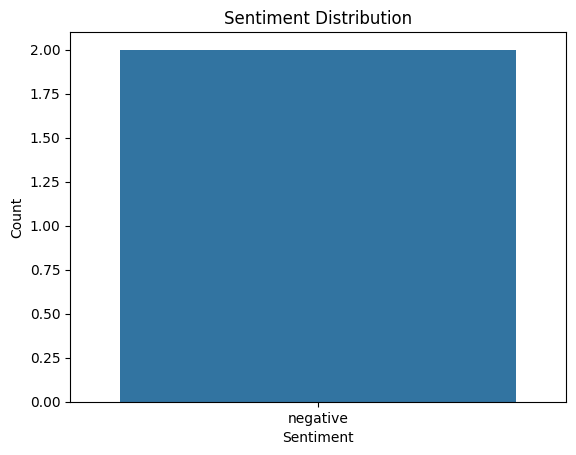

In [17]:
# Plot sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))